# Categorical Variables

.smaller[
```python
import pandas as pd
df = pd.DataFrame({
  'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
  'salary': [103, 89, 142, 54, 63, 219],
     'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
```
]


    

      

      
boro
salary
vegan

    

    

    
0
Manhattan
103
No

    
1
Queens
89
No

    
2
Manhattan
142
No

    
3
Brooklyn
54
Yes

    
4
Brooklyn
63
Yes

    
5
Bronx
219
No

    

  




Before we can apply a machine learning algorithm, we first
need to think about how we represent our data.

Earlier, I said x \in R^n. That’s not how you usually get
data. Often data has units, possibly different units for
different sensors, it has a mixture of continuous values and
discrete values, and different measurements might be on
totally different scales.

First, let me explain how to deal with discrete input
variables, also known as categorical features. They come up
in nearly all applications.

Scikit-learn requires you to explicitly handle these, and assumes
in general that all your input is continuous numbers.
This is different from how many libraries in R do it,
which deal with categorical variables implicitly.

# Ordinal encoding

.smaller[
```python
df['boro_ordinal'] = df.boro.astype("category").cat.codes
df
```
]
.left-column[


    

      

      
boro
salary
vegan

    

    

    
0
2
103
No

    
1
3
89
No

    
2
2
142
No

    
3
1
54
Yes

    
4
1
63
Yes

    
5
0
219
No

    

  

]

--

.right-column[
![:scale 100%](images/boro_ordinal.png)
]



If you encode all three values using the same feature, then
you are imposing a linear relation between them, and in
particular you define an order between the categories.
Usually, there is no semantic ordering of the categories,
and so we shouldn’t introduce one in our representation of
the data.

# Ordinal encoding

.smaller[
```python
df['boro_ordinal'] = df.boro.astype("category").cat.codes
df
```
]
.left-column[


    

      

      
boro_ordinal
salary
vegan

    

    

    
0
2
103
No

    
1
3
89
No

    
2
2
142
No

    
3
1
54
Yes

    
4
1
63
Yes

    
5
0
219
No

    

  

]

.right-column[
![:scale 100%](images/boro_ordinal_classification.png)
]

# One-Hot (Dummy) Encoding

.narrow-left-column[


    

      

      
boro
salary
vegan

    

    

    
0
Manhattan
103
No

    
1
Queens
89
No

    
2
Manhattan
142
No

    
3
Brooklyn
54
Yes

    
4
Brooklyn
63
Yes

    
5
Bronx
219
No

    

  

]

.wide-right-column[
.tiny[
```python
pd.get_dummies(df)
```


    

      

      
salary
boro_Bronx
boro_Brooklyn
boro_Manhattan
boro_Queens
vegan_No
vegan_Yes

    

    

    
0
103
0
0
1
0
1
0

    
1
89
0
0
0
1
1
0

    
2
142
0
0
1
0
1
0

    
3
54
0
1
0
0
0
1

    
4
63
0
1
0
0
0
1

    
5
219
1
0
0
0
1
0

    

  

]
]


Instead, we add one new feature for each category,

And that feature encodes whether a sample belongs to this
category or not.

That’s called a one-hot encoding, because only one of the
three features in this example is active at a time.

You could actually get away with n-1 features, but in
machine learning that usually doesn’t matter

One way to do is with Pandas. Here I have an example of a
data frame where I have the boroughs of New York as a
categorical variable and variable saying whether they are vegan. One to get the
dummies is to get dummies on this data frame. This will
create new columns, it will actually replace borough column
by four columns that correspond to the four different
values. The get_dummies applies transformation to all
columns that have a dtype that's either object or
categorical.

In this case we didn't actually want to transform the target variable vegan.

# One-Hot (Dummy) Encoding

.narrow-left-column[


    

      

      
boro
salary
vegan

    

    

    
0
Manhattan
103
No

    
1
Queens
89
No

    
2
Manhattan
142
No

    
3
Brooklyn
54
Yes

    
4
Brooklyn
63
Yes

    
5
Bronx
219
No

    

  

]

.wide-right-column[
.tiny[
```python
pd.get_dummies(df, columns=['boro'])
```


    

      

      
salary
vegan
boro_Bronx
boro_Brooklyn
boro_Manhattan
boro_Queens

    

    

    
0
103
No
0
0
1
0

    
1
89
No
0
0
0
1

    
2
142
No
0
0
1
0

    
3
54
Yes
0
1
0
0

    
4
63
Yes
0
1
0
0

    
5
219
No
1
0
0
0

    

  

]
]


We can specify selectively which columns to apply the encoding to.

# One-Hot (Dummy) Encoding
.narrow-left-column[


    

      

      
boro
salary
vegan

    

    

    
0
2
103
No

    
1
3
89
No

    
2
2
142
No

    
3
1
54
Yes

    
4
1
63
Yes

    
5
0
219
No

    

  

]
.wide-right-column[
.tiny[

```python
pd.get_dummies(df_ordinal, columns=['boro'])
```


  

    

      
salary
vegan
boro_0
boro_1
boro_2
boro_3

  

  

    
0
103
No
0
0
1
0

    
1
89
No
0
0
0
1

    
2
142
No
0
0
1
0

    
3
54
Yes
0
1
0
0

    
4
63
Yes
0
1
0
0

    
5
219
No
1
0
0
0

  



]
]


This also helps if the variable was already encoded using integers.
Sometimes, someone has already encoded the categorical
variables to integers like here. So here this is exactly the
same information only except instead of strings you have
them numbered. If you call the get_dummies on this nothing
happens because none of them are object data types or
categorical data types. If you want to look at the One Hot
Encoding, you can explicitly pass columns equal and this
will transform into boro_1, boro_2, boro_3.
In this case get_dummies usually wouldn't do anything, but we can tell
it which variables are categorical and it will dummy encode those for us.

.tiny[
.left-column[
```python
df = pd.DataFrame({
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
           'Brooklyn', 'Brooklyn', 'Bronx'],
  'salary': [103, 89, 142, 54, 63, 219],
  'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro']
```


  

    

      
salary
vegan
boro_Bronx
boro_Brooklyn
boro_Manhattan
boro_Queens

  

  

    
0
103
No
0
0
1
0

    
1
89
No
0
0
0
1

    
2
142
No
0
0
1
0

    
3
54
Yes
0
1
0
0

    
4
63
Yes
0
1
0
0

    
5
219
No
1
0
0
0

  



]
.right-column[
```python
df = pd.DataFrame({
  'boro': ['Brooklyn', 'Manhattan', 'Brooklyn',
           'Queens', 'Brooklyn', 'Staten Island'],
  'salary': [61, 146, 142, 212, 98, 47],
  'vegan': ['Yes', 'No','Yes','No', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
```


  

    

      
salary
vegan
boro_Brooklyn

      
boro_Manhattan
boro_Queens
boro_Staten Island

  

  

    
0
61
Yes
1
0
0
0

    
1
146
No
0
1
0
0

    
2
142
Yes
1
0
0
0

    
3
212
No
0
0
1
0

    
4
98
Yes
1
0
0
0

    
5
47
No
0
0
0
1

  



]]




If someone else gives you a new data set and in this new
data set there is Staten Island, Manhattan, Bronx and
Brooklyn. So new dataset doesn't have anyone from Queens. So
now you transform this with get_dummies, you get something
that has the same shape as the original data but actually,
the last column means something completely different.
Because now the last column is Staten Island, not Queens. If
someone gives you separate training and test data sets, if
you call get_dummies, you don't know that the columns
correspond actually to the same thing. Unless you take care
of the names, unfortunately, scikit-learn completely ignores
column names.

class: smaller

#Pandas Categorical Columns

.smaller[
```python

df = pd.DataFrame({
   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
   'salary': [103, 89, 142, 54, 63, 219],
   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})

df['boro'] = pd.Categorical(df.boro,
                            categories=['Manhattan', 'Queens', 'Brooklyn',
                                                'Bronx', 'Staten Island'])
pd.get_dummies(df, columns=['boro'])
```
]
.tiny[


    

      

      
salary
vegan
boro_Manhattan
boro_Queens
boro_Brooklyn
boro_Bronx
boro_Staten Island

    

    

    
0
103
No
1
0
0
0
0

    
1
89
No
0
1
0
0
0

    
2
142
No
1
0
0
0
0

    
3
54
Yes
0
0
1
0
0

    
4
63
Yes
0
0
1
0
0

    
5
219
No
0
0
0
1
0

    

  

]



The way to fix this is by using Pandas categorical types.
Since we know what the boroughs of Manhattan are, we can
create Pandas categorical dtype, we can create this
categorical dtype with the categories Manhattan, Queens,
Brooklyn, Bronx, and Staten Island. So now I have my column
here and I'm going to convert it to a categorical dtype. So
now it will not actually store the strings. It will just
internally store zero to four, and it will also store what
are the possible values. If a call get_dummies it will use
all the possible values and for each of the possible values
it will create a column. Even though Staten Island has not
appeared in my dataset, it will still make a column for
Staten Island. If I fix this categorical dtype I can apply
it to the training and test data set and that'll make sure
all the columns are always the same no matter what are the
values are actually in the data set.

# OneHotEncoder

```python
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
                            'Brooklyn', 'Brooklyn', 'Bronx']})

ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()
```
```
array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])
```

- Always transforms all columns



- Fit-transform paradigm ensures train and test-set categories correspond.

# OneHotEncoder + ColumnTransformer

```python
categorical = df.dtypes == object

preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

model = make_pipeline(preprocess, LogisticRegression())
```


The way to use this with mixed type data is column transformer, which
allows you to transforms only some of the columns. For
example, you can call categorical encoder only on the
categorical columns and call StandardScaler on the
non-categorical columns, and then use that to preprocess
your data. Right now using Pandas, make sure your column
names match up, make everything to an integer,
or use column transformer and everything is awesome.

In contrast to basically all other estimators in sklearn,
this uses the column information in pandas and allows you to slice
out different columns based on column names, integer indices or boolean masks.
In this example I'm constructing a boolean mask

class:center, middle
![:scale 100%](images/column_transformer_schematic.png)


Here's a schematic of the column transformer.
Most commonly you might want to separate continuous and categorical columns,
but you can select any subsets of columns you like. They can also overlap.
Or you can apply multiple transformations to the same set of columns.
Let's say I want a scaled version of the data, but I also want to
extract principal components. I can use the same column as inputs to multiple
transformers, and the results will be concatenated.

FIXME add code

class: some-space

# Dummy variables and colinearity

- One-hot is redundant (last one is 1 – sum of others)
- Can introduce co-linearity
- Can drop one
- Choice which one matters for penalized models
- Keeping all can make the model more interpretable




N/A

class: some-space

#Models Supporting Discrete Features

- In principle:
  - All tree-based models, naive Bayes
- In scikit-learn:
  - Some Naive Bayes classifiers.
- In scikit-learn "soon":
  - Decision trees, random forests, gradient boosting




In principle all tree-based models support categorical
features, in scikit-learn none of them do, hopefully, soon
they will. So what you can do is either you do the One Hot
Encoder or you just encode this as integers and treat it as
a continuous. If you have very high categorical variables
with many levels, maybe it keeping it as an integer might
make more sense.

# Target Encoding (Impact Encoding)

![:scale 100%](images/zip_code_prices.png)

class: some-space
# Target Encoding (Impact Encoding)
- For high cardinality categorical features
- Instead of 70 one-hot variables, one “response encoded” variable.
- For regression:
  - "average price in zip code”
- Binary classification:
  – “building in this zip code have a likelihood p for class 1”
- Multiclass:
  – One feature per class: probability distribution




So there's also another way to encode categorical variables
that is often used, I like to call it target-Based Encoding.
It's basically for very high cardinality categorical
features. For example, if you have categorical feature it's
all US states and you don't have a lot of samples or if you
have categorical features that's all US zip codes, if you
have all different things, you don't want to do One Hot
Encoding. So you get 50 new features, which if you don't
have a lot of data would be a lot of features. So instead,
you can use one single variable, it basically encodes the
response. So for regression, it would be people in this
state have an average response of that. Obviously you don't
want to do this on the test set basically or you want to do
this on the whole dataset for each level of the categorical
variable, you want to find out what is the mean response and
just use this as the future value. So you get one single
future. For binary classification, you can just use the
fraction of people that are classified as Class One. For
multi-class, you usually do the percentage or fraction of
people in each of the classes. So in multi-class, you get
one new feature per class and you count for each state how
many people in this state are classified for each of them.

class: center, middle

# More encodings for categorical features:
## http://contrib.scikit-learn.org/categorical-encoding/

# Load data, include ZIP code
```python
data = fetch_openml("house_sales", as_frame=True)
X = data.frame.drop(['date', 'price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target)
X_train.columns
```
```
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
```

class: compact
.tiny[
```python
X_train.head()
```


  

    

      
bedrooms
bathrooms
sqft_living
sqft_lot
floors
...
zipcode
lat
long
sqft_living15
sqft_lot15

  

  

    
10666
4.0
2.50
2160.0
7000.0
2.0
...
98029.0
47.566
-122.013
2300.0
7440.0

    
19108
4.0
4.25
3250.0
11780.0
2.0
...
98004.0
47.632
-122.203
1800.0
9000.0

    
20132
3.0
2.50
1280.0
1920.0
3.0
...
98105.0
47.662
-122.324
1450.0
1900.0

    
16169
4.0
1.50
1220.0
9600.0
1.0
...
98014.0
47.646
-121.909
1180.0
9000.0

    
16890
3.0
1.50
2120.0
6290.0
1.0
...
98108.0
47.566
-122.318
1620.0
5400.0

  




```python
te = TargetEncoder(cols='zipcode').fit(X_train, y_train)
te.transform(X_train).head()
```


  

    

      
bedrooms
bathrooms
sqft_living
sqft_lot
floors
...
zipcode
lat
long
sqft_living15
sqft_lot15

  

  

    
10666
4.0
2.50
2160.0
7000.0
2.0
...
6.164e+05
47.566
-122.013
2300.0
7440.0

    
19108
4.0
4.25
3250.0
11780.0
2.0
...
1.357e+06
47.632
-122.203
1800.0
9000.0

    
20132
3.0
2.50
1280.0
1920.0
3.0
...
8.503e+05
47.662
-122.324
1450.0
1900.0

    
16169
4.0
1.50
1220.0
9600.0
1.0
...
4.464e+05
47.646
-121.909
1180.0
9000.0

    
16890
3.0
1.50
2120.0
6290.0
1.0
...
3.604e+05
47.566
-122.318
1620.0
5400.0

  




```python
y_train.groupby(X_train.zipcode).mean()[X_train.head().zipcode])
```


  

    

      
zipcode
98029.0
98004.0
98105.0
98014.0
98108.0

  

  

    
price
616356.941
1.357e+06
850306.816
446448.065
360416.811

  




]

class: smallest
```python
X = data.frame.drop(['date', 'price', 'zipcode'], axis=1)
scores = cross_val_score(Ridge(), X, target)
np.mean(scores)
```
```
0.69
```
--

```python
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
X = data.frame.drop(['date', 'price'], axis=1)

ct = make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough')
pipe_ohe = make_pipeline(ct, Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)
```
```
0.52
```

--

```python
from category_encoders import TargetEncoder
X = data.frame.drop(['date', 'price'], axis=1)
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)
```
```
0.78
```

class: center, middle
# Questions?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [11]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan']]
df

,boro,boro_ordinal,vegan
0,Manhattan,2,No
1,Queens,3,No
2,Manhattan,2,No
3,Brooklyn,1,Yes
4,Brooklyn,1,Yes
5,Bronx,0,No


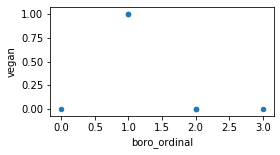

In [12]:
df_int = df.copy()
df_int['vegan'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(df[['boro_ordinal']], df.vegan)
lr.coef_

array([[-0.45784715]])

In [14]:
lr.intercept_

array([-0.03782071])

In [15]:
dec = lr.decision_function(np.linspace(0, 3).reshape(-1, 1))

In [16]:
lr.predict(np.linspace(0, 3).reshape(-1, 1))

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

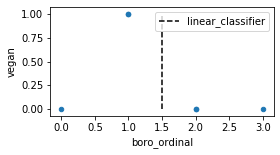

In [19]:
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.vlines([1.5], 0, 1, linestyle='--', label='linear_classifier')
plt.legend(loc='best')

In [20]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [23]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,103,0,0,1,0,1,0
1,89,0,0,0,1,1,0
2,142,0,0,1,0,1,0
3,54,0,1,0,0,0,1
4,63,0,1,0,0,0,1
5,219,1,0,0,0,1,0


In [24]:
pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [25]:
df_ordinal = df.copy()
df_ordinal['boro'] = df.boro.astype("category").cat.codes
df_ordinal

,boro,salary,vegan
0,2,103,No
1,3,89,No
2,2,142,No
3,1,54,Yes
4,1,63,Yes
5,0,219,No


In [55]:
df2html(df_ordinal)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>2</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>3</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>2</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>1</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>1</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>0</td><td>219</td><td>No</td></tr>
  </tbody>
</table>


In [26]:
pd.get_dummies(df_ordinal, columns=['boro'])

,salary,vegan,boro_0,boro_1,boro_2,boro_3
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [57]:
df2html(pd.get_dummies(df_ordinal, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_0</th><th>boro_1</th><th>boro_2</th><th>boro_3</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [28]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
df_dummies

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [29]:
df = pd.DataFrame({'boro': ['Brooklyn', 'Manhattan', 'Brooklyn', 'Queens', 'Brooklyn', 'Staten Island'],
                   'salary': [61, 146, 142, 212, 98, 47],
                   'vegan': ['Yes', 'No','Yes','No', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)

,salary,vegan,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island
0,61,Yes,1,0,0,0
1,146,No,0,1,0,0
2,142,Yes,1,0,0,0
3,212,No,0,0,1,0
4,98,Yes,1,0,0,0
5,47,No,0,0,0,1


In [30]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df['boro'] = pd.Categorical(
    df.boro, categories=['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)

,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0


In [31]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

# target featurizer

In [35]:
from sklearn.datasets import fetch_openml

data = fetch_openml("house_sales", as_frame=True)

data.frame.columns

c:\users\t3kci\checkout\scikit-learn\sklearn\datasets\_openml.py:376: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [36]:
data.frame.zipcode.value_counts()

98103.0    602
98038.0    590
98115.0    583
98052.0    574
98117.0    553
          ... 
98102.0    105
98010.0    100
98024.0     81
98148.0     57
98039.0     50
Name: zipcode, Length: 70, dtype: int64

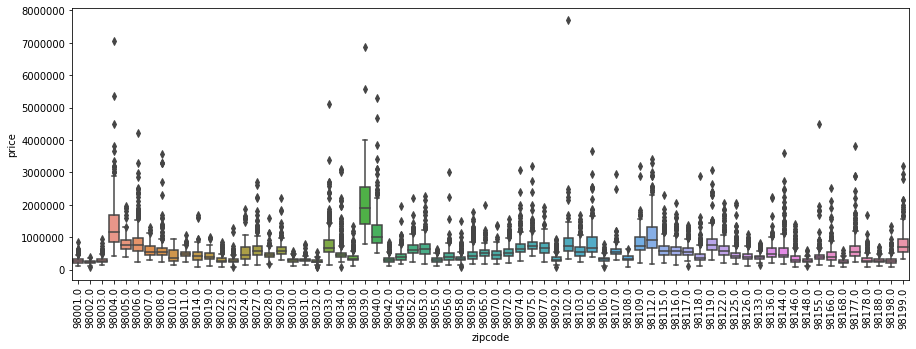

In [38]:
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data.frame.zipcode, data.frame.price)
#plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [41]:
from sklearn.model_selection import train_test_split
target = data.frame.price

data = fetch_openml("house_sales", as_frame=True)
X = data.frame.drop(['date', 'price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target)
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [42]:
# drop some stuff so it fits on slide
import pandas as pd
pd.set_option('display.max_columns', 10)
#disp = X_train.drop(['waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated'], axis=1).head()
disp = X_train.head()
disp

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15
8922,3.0,2.50,2497.0,4400.0,2.0,...,98001.0,47.2873,-122.283,2434.0,4400.0
8423,3.0,2.50,1600.0,2788.0,2.0,...,98031.0,47.4034,-122.187,1720.0,3605.0
19597,3.0,1.00,840.0,8400.0,1.0,...,98023.0,47.3281,-122.344,1030.0,8640.0
11275,3.0,2.25,2260.0,54014.0,1.0,...,98072.0,47.7657,-122.131,2140.0,44431.0
5885,3.0,1.00,680.0,2400.0,1.0,...,98144.0,47.5982,-122.299,1470.0,3600.0


In [46]:
from category_encoders import TargetEncoder
te = TargetEncoder(cols='zipcode').fit(X_train, y_train)
te.transform(X_train).head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15
8922,3.0,2.50,2497.0,4400.0,2.0,...,282113.014981,47.2873,-122.283,2434.0,4400.0
8423,3.0,2.50,1600.0,2788.0,2.0,...,303056.463158,47.4034,-122.187,1720.0,3605.0
19597,3.0,1.00,840.0,8400.0,1.0,...,286543.314208,47.3281,-122.344,1030.0,8640.0
11275,3.0,2.25,2260.0,54014.0,1.0,...,563072.391089,47.7657,-122.131,2140.0,44431.0
5885,3.0,1.00,680.0,2400.0,1.0,...,605801.958491,47.5982,-122.299,1470.0,3600.0


In [49]:
disp2 = te.transform(X_train).head()
disp2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15
8922,3.0,2.50,2497.0,4400.0,2.0,...,282113.014981,47.2873,-122.283,2434.0,4400.0
8423,3.0,2.50,1600.0,2788.0,2.0,...,303056.463158,47.4034,-122.187,1720.0,3605.0
19597,3.0,1.00,840.0,8400.0,1.0,...,286543.314208,47.3281,-122.344,1030.0,8640.0
11275,3.0,2.25,2260.0,54014.0,1.0,...,563072.391089,47.7657,-122.131,2140.0,44431.0
5885,3.0,1.00,680.0,2400.0,1.0,...,605801.958491,47.5982,-122.299,1470.0,3600.0


In [51]:
pd.DataFrame(target.groupby(X.zipcode).mean()[X_train.head().zipcode]).T

zipcode,98001.0,98031.0,98023.0,98072.0,98144.0
price,280804.690608,300539.890511,286732.791583,569958.465201,594547.650146


In [53]:
pd.DataFrame(y_train.groupby(X_train.zipcode).mean()[X_train.head().zipcode]).T

zipcode,98001.0,98031.0,98023.0,98072.0,98144.0
price,282113.014981,303056.463158,286543.314208,563072.391089,605801.958491


In [54]:
from category_encoders import LeaveOneOutEncoder, TargetEncoder

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
X = data.frame.drop(['date', 'price'], axis=1)
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)

0.7862175426353509

In [66]:
X = data.frame.drop(['date', 'price', 'zipcode'], axis=1)
scores = cross_val_score(Ridge(), X, target)
np.mean(scores)

0.6902748870651891

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
X = data.frame.drop(['date', 'price'], axis=1)

pipe_ohe = make_pipeline(make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough'), Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)

0.5257379776972864

In [68]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [70]:
TargetEncoder(cols='zipcode').fit_transform(data.frame, target)

,date,price,bedrooms,bathrooms,sqft_living,...,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180.0,...,310612.755725,47.5112,-122.257,1340.0,5650.0
1,20141209T000000,538000.0,3.0,2.25,2570.0,...,469455.770732,47.7210,-122.319,1690.0,7639.0
2,20150225T000000,180000.0,2.0,1.00,770.0,...,462480.035336,47.7379,-122.233,2720.0,8062.0
3,20141209T000000,604000.0,4.0,3.00,1960.0,...,551688.673004,47.5208,-122.393,1360.0,5000.0
4,20150218T000000,510000.0,3.0,2.00,1680.0,...,685605.775510,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530.0,...,584919.210963,47.6993,-122.346,1530.0,1509.0
21609,20150223T000000,400000.0,4.0,2.50,2310.0,...,359483.239583,47.5107,-122.362,1830.0,7200.0
21610,20140623T000000,402101.0,2.0,0.75,1020.0,...,594547.650146,47.5944,-122.299,1020.0,2007.0
21611,20150116T000000,400000.0,3.0,2.50,1600.0,...,616990.592233,47.5345,-122.069,1410.0,1287.0
